## zipline installation

https://zipline.ml4trading.io/index.html 참고

무지성 따라하기

1. python 3.7 이상으로 아나콘다 가상환경 만들기
2. conda install -c ml4t -c conda-forge -c ranaroussi zipline-reloaded

## Zipline 사용하기

zipline은 initialize랑 handle_data 넣으면 굴러간다

In [2]:
# 오류나는거 방지
import zipline
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# 매직커맨드 zipline 쓸 준비
%load_ext zipline

%matplotlib inline

In [3]:
# 사용할 수 있는 데이터 확인
!zipline bundles

csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


In [153]:
# 잘못 들어간 데이터 있으면 삭제
!zipline clean -b quantopian-quandl --before '2021-10-19'

[2021-10-17 06:12:41.843401] INFO: zipline.data.bundles.core: Cleaning 2021-10-17T06;06;46.623873.


In [5]:
import os
from os import getenv

import pandas as pd

api_key = pd.read_csv('../../../data/api_key.csv')
QUANDL_API_KEY = api_key[api_key['api'] == 'QUANDL_API_KEY'].key.values[0]

os.environ["QUANDL_API_KEY"] = QUANDL_API_KEY

QUANDL_API_KEY = getenv('QUANDL_API_KEY', None)

In [5]:
# bundle에 quandl 데이터 집어넣기

#!zipline ingest -b quantopian-quandl
!zipline ingest

Merging daily equity files:


[2021-10-25 04:45:34.796217] INFO: zipline.data.bundles.core: Ingesting quandl.
[2021-10-25 04:45:34.796217] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2021-10-25 04:47:36.327244] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2021-10-25 04:48:18.968359] INFO: zipline.data.bundles.quandl: Generating asset metadata.
C:\Users\kiwoom\anaconda3\envs\ml4tz\lib\site-packages\zipline\data\bcolz_daily_bars.py:366: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
[2021-10-25 04:51:50.938005] INFO: zipline.data.bundles.quandl: Parsing split data.
[2021-10-25 04:51:51.466218] INFO: zipline.data.bundles.quandl: Parsing dividend data.
[2021-10-25 04:51:57.595363] WARNING: zipline.data.adjustments: Couldn't compute ratio for divide

In [6]:
!zipline bundles

[2021-10-25 04:51:57.601332] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=1657, ex_date=2013-09-30, amount=21.355
[2021-10-25 04:51:57.601332] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=1775, ex_date=1994-12-01, amount=76.000
[2021-10-25 04:51:57.601332] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=1776, ex_date=1996-11-04, amount=36.708
[2021-10-25 04:51:57.601332] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=2455, ex_date=2016-10-03, amount=25.611
[2021-10-25 04:51:57.601332] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=2687, ex_date=2008-06-26, amount=10.000
[2021-10-25 04:51:57.602344] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=2900, ex_date=2007-07-02, amount=88.530
[2021-10-25 04:51:57.602344] WARNING: zipline.data.adjustments: Dividend ratio <= 0 for dividend sid=3088, ex_date=2015-04-27, amount=31.291


csvdir <no ingestions>
quandl 2021-10-25 04:45:34.102891
quantopian-quandl <no ingestions>


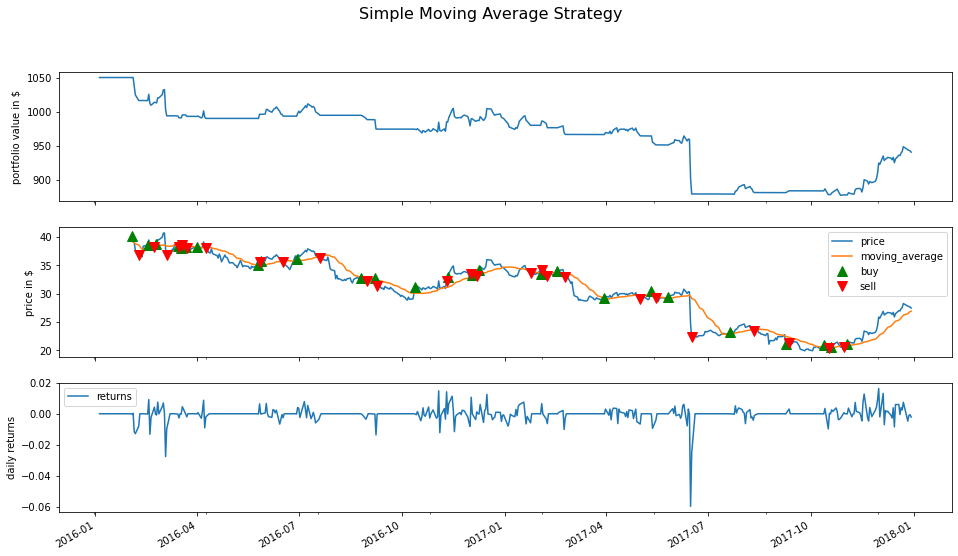

,period_open,period_close,pnl,long_value,shorts_count,longs_count,long_exposure,transactions,returns,portfolio_value,...,max_leverage,sortino,excess_return,trading_days,treasury_period_return,algo_volatility,alpha,beta,price,moving_average
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.0,0.0,0,0,0.0,[],0.000000,1050.0000,...,0.000000,NaN,0.0,1,0.0,NaN,None,None,NaN,NaN
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,0.0,0.0,0,0,0.0,[],0.000000,1050.0000,...,0.000000,NaN,0.0,2,0.0,0.000000,None,None,NaN,NaN
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,0.0,0.0,0,0,0.0,[],0.000000,1050.0000,...,0.000000,NaN,0.0,3,0.0,0.000000,None,None,NaN,NaN
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,0.0,0.0,0,0,0.0,[],0.000000,1050.0000,...,0.000000,NaN,0.0,4,0.0,0.000000,None,None,NaN,NaN
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,0.0,0.0,0,0,0.0,[],0.000000,1050.0000,...,0.000000,NaN,0.0,5,0.0,0.000000,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,7.0,282.5,0,1,282.5,[],0.007434,948.6413,...,0.393824,-0.780041,0.0,499,0.0,0.073436,None,None,28.25,26.2195
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,-4.5,278.0,0,1,278.0,[],-0.004744,944.1413,...,0.393824,-0.816531,0.0,500,0.0,0.073433,None,None,27.80,26.4505
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,-0.9,277.1,0,1,277.1,[],-0.000953,943.2413,...,0.393824,-0.823379,0.0,501,0.0,0.073362,None,None,27.71,26.6580
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,-0.6,276.5,0,1,276.5,[],-0.000636,942.6413,...,0.393824,-0.827677,0.0,502,0.0,0.073289,None,None,27.65,26.8215


In [8]:
%%zipline --start 2016-1-1 --end 2017-12-31 --capital-base 1050.0 --no-benchmark

# imports 
from zipline.api import order_target, record, symbol
from zipline.finance import commission
import matplotlib.pyplot as plt
import numpy as np

# parameters 
ma_periods = 20
selected_stock = 'KR'
n_stocks_to_buy = 10

def initialize(context):
    context.time = 0
    context.asset = symbol(selected_stock)
    # 1. manually setting the commission
    context.set_commission(commission.PerShare(cost=0.001, min_trade_cost=0))

def handle_data(context, data):
    # 2. warm-up period
    context.time += 1
    if context.time < ma_periods:
        return

    # 3. access price history
    price_history = data.history(context.asset, fields="price", bar_count=ma_periods, frequency="1d")
 
    # 4. calculate moving averages
    ma = price_history.mean()
    
    # 5. trading logic
    
    # cross up
    if (price_history[-2] < ma) & (price_history[-1] > ma):
        order_target(context.asset, n_stocks_to_buy)
    # cross down
    elif (price_history[-2] > ma) & (price_history[-1] < ma):
        order_target(context.asset, 0)

    # save values for later inspection
    record(price=data.current(context.asset, 'price'),
           moving_average=ma)
    
# 6. analyze block
def analyze(context, perf):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=[16, 9])

    # portfolio value
    perf.portfolio_value.plot(ax=ax[0])
    ax[0].set_ylabel('portfolio value in $')
    
    # asset
    perf[['price', 'moving_average']].plot(ax=ax[1])
    ax[1].set_ylabel('price in $')
    
    # mark transactions
    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[[t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax[1].plot(buys.index, perf.price.loc[buys.index], '^', markersize=10, color='g', label='buy')
    ax[1].plot(sells.index, perf.price.loc[sells.index], 'v', markersize=10, color='r', label='sell')
    ax[1].legend()
    
    # daily returns
    perf.returns.plot(ax=ax[2])
    ax[2].set_ylabel('daily returns')

    fig.suptitle('Simple Moving Average Strategy', fontsize=16)
    plt.legend()
    plt.show()
    
# @classmethod
# def from_returns(cls, benchmark_returns):
#     return cls(
#         benchmark_returns=benchmark_returns,
#         benchmark_file=None,
#         benchmark_sid=None,
#         benchmark_symbol=None,
#         no_benchmark=benchmark_returns is not None,
#     )
    
#     print('Final portfolio value (including cash): {}$'.format(np.round(perf.portfolio_value[-1], 2)))

In [9]:
%%zipline --start 2018-1-1 --end 2021-1-1 --capital-base 10000 --no-benchmark
from zipline.api import order, record, symbol

def initialize(context):
    context.i = 0
    pass

def handle_data(context, data):
    if context.i == 0:
        order(symbol('AAPL'), 100)
    record(AAPL=data.current(symbol('AAPL'), 'price'))
    
    context.i += 1

,period_open,period_close,starting_exposure,pnl,shorts_count,positions,ending_exposure,transactions,long_value,ending_value,...,sharpe,excess_return,benchmark_period_return,benchmark_volatility,trading_days,algo_volatility,period_label,alpha,beta,algorithm_period_return
2018-01-02 21:00:00+00:00,2018-01-02 14:31:00+00:00,2018-01-02 21:00:00+00:00,0.0,0.0000,0,[],0.0,[],0.0,0.0,...,NaN,0.0,0.0,NaN,1,NaN,2018-01,None,None,0.000000
2018-01-03 21:00:00+00:00,2018-01-03 14:31:00+00:00,2018-01-03 21:00:00+00:00,0.0,-8.7115,0,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",17223.0,"[{'amount': 100, 'dt': 2018-01-03 21:00:00+00:...",17223.0,17223.0,...,-11.224972,0.0,0.0,0.0,2,0.009779,2018-01,None,None,-0.000871
2018-01-04 21:00:00+00:00,2018-01-04 14:31:00+00:00,2018-01-04 21:00:00+00:00,17223.0,80.0000,0,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",17303.0,[],17303.0,17303.0,...,7.715837,0.0,0.0,0.0,3,0.077686,2018-01,None,None,0.007129
2018-01-05 21:00:00+00:00,2018-01-05 14:31:00+00:00,2018-01-05 21:00:00+00:00,17303.0,197.0000,0,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",17500.0,[],17500.0,17500.0,...,11.182159,0.0,0.0,0.0,4,0.150407,2018-01,None,None,0.026829
2018-01-08 21:00:00+00:00,2018-01-08 14:31:00+00:00,2018-01-08 21:00:00+00:00,17500.0,-65.0000,0,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",17435.0,[],17435.0,17435.0,...,6.429206,0.0,0.0,0.0,5,0.159655,2018-01,None,None,0.020329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 18:00:00+00:00,2020-12-24 14:31:00+00:00,2020-12-24 18:00:00+00:00,0.0,0.0000,0,[],0.0,[],0.0,0.0,...,-0.039515,0.0,0.0,0.0,752,0.130539,2020-12,None,None,-0.039771
2020-12-28 21:00:00+00:00,2020-12-28 14:31:00+00:00,2020-12-28 21:00:00+00:00,0.0,0.0000,0,[],0.0,[],0.0,0.0,...,-0.039489,0.0,0.0,0.0,753,0.130452,2020-12,None,None,-0.039771
2020-12-29 21:00:00+00:00,2020-12-29 14:31:00+00:00,2020-12-29 21:00:00+00:00,0.0,0.0000,0,[],0.0,[],0.0,0.0,...,-0.039462,0.0,0.0,0.0,754,0.130365,2020-12,None,None,-0.039771
2020-12-30 21:00:00+00:00,2020-12-30 14:31:00+00:00,2020-12-30 21:00:00+00:00,0.0,0.0000,0,[],0.0,[],0.0,0.0,...,-0.039436,0.0,0.0,0.0,755,0.130279,2020-12,None,None,-0.039771


In [105]:
%%zipline --start 2011-1-1 --end 2013-12-31 --capital-base 1000 --no-benchmark

from zipline.api import order, symbol
from zipline.algorithm import TradingAlgorithm

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    pass

def handle_data(context, data):
    df = data.history(context.asset, fields=["price", 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    order(context.asset, 1)
        
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', mode='a', index=False, header=None)
        
    context.i += 1

,period_open,period_close,returns,short_value,pnl,capital_used,orders,long_exposure,transactions,positions,...,alpha,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label
2011-01-03 21:00:00+00:00,2011-01-03 14:31:00+00:00,2011-01-03 21:00:00+00:00,0.000000,0.0,0.000000,0.000000,"[{'id': '80499bfb77f04111afb1046b367a453b', 'd...",0.00,[],[],...,None,None,NaN,NaN,0.000000,0.000000,0.0,0.0,1,2011-01
2011-01-04 21:00:00+00:00,2011-01-04 14:31:00+00:00,2011-01-04 21:00:00+00:00,-0.000167,0.0,-0.166645,-331.456645,"[{'id': '80499bfb77f04111afb1046b367a453b', 'd...",331.29,"[{'amount': 1, 'dt': 2011-01-04 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 1, 'cost_...",...,None,None,-11.224972,-11.224972,-0.000167,0.331345,0.0,0.0,2,2011-01
2011-01-05 21:00:00+00:00,2011-01-05 14:31:00+00:00,2011-01-05 21:00:00+00:00,0.002542,0.0,2.542000,-334.168000,"[{'id': '68ee98d22b1746c08aa3d73ba5154a4b', 'd...",668.00,"[{'amount': 1, 'dt': 2011-01-05 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 2, 'cost_...",...,None,None,8.280144,130.663214,-0.000167,0.666417,0.0,0.0,3,2011-01
2011-01-06 21:00:00+00:00,2011-01-06 14:31:00+00:00,2011-01-06 21:00:00+00:00,-0.000706,0.0,-0.707865,-333.897865,"[{'id': 'd165b87d06834bb6abb6f13909943a1b', 'd...",1001.19,"[{'amount': 1, 'dt': 2011-01-06 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 3, 'cost_...",...,None,None,4.574722,18.263878,-0.000706,0.999523,0.0,0.0,4,2011-01
2011-01-07 21:00:00+00:00,2011-01-07 14:31:00+00:00,2011-01-07 21:00:00+00:00,0.006989,0.0,7.000940,-336.289060,"[{'id': '08c0b4da3a9a43f5b0100f8a34f31127', 'd...",1344.48,"[{'amount': 1, 'dt': 2011-01-07 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 4, 'cost_...",...,None,None,8.603020,84.720677,-0.000706,1.332926,0.0,0.0,5,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-24 18:00:00+00:00,2013-12-24 14:31:00+00:00,2013-12-24 18:00:00+00:00,-0.023966,0.0,-1810.444835,-567.954835,"[{'id': '405d7f7ef58444e39bd816a933e15de4', 'd...",425184.83,"[{'amount': 1, 'dt': 2013-12-24 18:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 749, 'cos...",...,None,None,0.175825,0.222154,-2.313058,1706.151338,0.0,0.0,750,2013-12
2013-12-26 21:00:00+00:00,2013-12-26 14:31:00+00:00,2013-12-26 21:00:00+00:00,-0.038301,0.0,-2824.012950,-564.182950,"[{'id': '9a78fd43b4c24c1ba8420c8fdf83c650', 'd...",422925.00,"[{'amount': 1, 'dt': 2013-12-26 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 750, 'cos...",...,None,None,0.175077,0.221209,-2.313058,1706.151338,0.0,0.0,751,2013-12
2013-12-27 21:00:00+00:00,2013-12-27 14:31:00+00:00,2013-12-27 21:00:00+00:00,-0.040303,0.0,-2857.781045,-560.371045,"[{'id': 'bba65c2520d347fba4459d12c18747d8', 'd...",420627.59,"[{'amount': 1, 'dt': 2013-12-27 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 751, 'cos...",...,None,None,0.174298,0.220224,-2.313058,1706.151338,0.0,0.0,752,2013-12
2013-12-30 21:00:00+00:00,2013-12-30 14:31:00+00:00,2013-12-30 21:00:00+00:00,-0.061475,0.0,-4183.348260,-554.798260,"[{'id': '31e5be28afcb46229c0c5819684524a7', 'd...",416999.04,"[{'amount': 1, 'dt': 2013-12-30 21:00:00+00:00...","[{'sid': Equity(8 [AAPL]), 'amount': 752, 'cos...",...,None,None,0.173171,0.218800,-2.313058,1706.151338,0.0,0.0,753,2013-12


<AxesSubplot:>

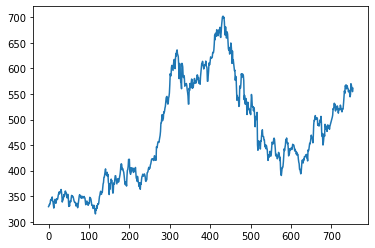

In [110]:
import pandas as pd
pd.read_csv('stock_data.csv')['price'].plot()

## 참고. Custom 데이터 입력방법

In [21]:
# 데이터 집어넣어야 하는데 기존에는 ingest로 quandl 쓸 수 있었는데 이제 못쓰게됨
import pandas as pd
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 10, 16)

data = web.DataReader("FB", "yahoo", start, end)[['Adj Close']]
data.columns = ['FB']
data = data.tz_localize('UTC')

data.to_csv('daily/fb.csv', header=True, index=False)

In [22]:
start_session = pd.Timestamp('2006-02-06', tz='utc')
end_session = pd.Timestamp('2021-10-15', tz='utc')

In [23]:
from ipykernel import kernelapp as app
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

#start_session = data.date[0]
#end_session = data.date[3951]

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['daily'],
        '/daily',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)

<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x000001ED6E7E3208>>

In [ ]:
# 사용할 수 있는 데이터 확인
!zipline bundles

In [125]:
from ipykernel import kernelapp as app
from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

#start_session = data.date[0]
#end_session = data.date[3951]

register(
    'custom-csvdir-bundle',
    csvdir_equities(
        ['daily'],
        '/daily',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)

C:\Users\kiwoom\anaconda3\envs\ml4tz\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Overwriting bundle with name 'custom-csvdir-bundle'
  app.launch_new_instance()


<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x00000165DDEE6F48>>

In [37]:
import os
os.environ.get('home')

In [ ]:
environ.get("CSVDIR")

In [26]:
a = 'custom-csvdir-bundle'

In [34]:
from trading_calendars import register_calendar_alias

In [33]:
csvdir_equities(['daily'],'/daily')

<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x000001ED6A4F3108>>

In [25]:
!zipline ingest -b custom-csvdir-bundle

Error: No bundle registered with the name 'custom-csvdir-bundle'


In [128]:
register()

<function _make_bundle_core.<locals>.register at 0x00000165D0690678>

In [29]:
register(
    'CSVDIR',
    csvdir_equities(['daily'], '~/daily'),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)

<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x000001ED6A298A48>>

In [30]:
!zipline ingest -b custom-csvdir-bundle

Error: No bundle registered with the name 'custom-csvdir-bundle'


In [15]:
AAPL_path = os.getcwd() + '\TSLA.csv'
print(AAPL_path)

C:\Users\kiwoom\ml4t\02_market_and_fundamental_data\03_data_providers\TSLA.csv


In [13]:
data = web.DataReader("078930.KS", "yahoo", start, end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,54300.0,53300.0,53900.0,54300.0,98660.0,46527.613281
2017-01-03,54700.0,53100.0,54100.0,54600.0,258793.0,46784.671875
2017-01-04,54200.0,53200.0,54100.0,53600.0,330695.0,45927.812500
2017-01-05,53600.0,52700.0,53500.0,53200.0,186267.0,45585.070312
2017-01-06,54000.0,52900.0,53200.0,53800.0,113829.0,46099.187500
...,...,...,...,...,...,...
2021-10-08,44900.0,43450.0,44300.0,43800.0,242128.0,43800.000000
2021-10-12,45450.0,43950.0,44150.0,45000.0,295449.0,45000.000000
2021-10-13,45300.0,44450.0,44950.0,45150.0,197752.0,45150.000000


## Bundle에 안넣고 그냥 data로 불러서 쓸수도 있다

In [12]:
%%zipline --start 2011-1-1 --end 2013-12-31 --capital-base 1000 --no-benchmark

import pandas_datareader.data as web
import datetime
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.api import set_commission, commission
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

print(data)

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))

def handle_data(context, data):
    #order_target(context.sym, 1)
    order(context.sym, 1)

ValueError: no data for bundle 'quandl' on or before 2021-10-22 06:07:40.795907+00:00
maybe you need to run: $ zipline ingest -b quandl